In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
categories = np.load('/kaggle/input/timeseries/categories.npy')
categories.shape

(48000,)

In [3]:
valid_periods = np.load('/kaggle/input/timeseries/valid_periods.npy')
valid_periods.shape

(48000, 2)

Find out the shortest and longest interval in the time series.

In [4]:
min, max = (9999, -1), (0, -1)
for i, tuple in enumerate(valid_periods):
    diff = tuple[1] - tuple[0]
    if diff < min[0]: min = (diff, i)
    if diff > max[0]: max = (diff, i)
        
min, max

((24, 47852), (2776, 17143))

In [5]:
index_shortest = min[1]
index_longest = max[1]

In [6]:
training_data = np.load('/kaggle/input/timeseries/training_data.npy')
training_data.shape

(48000, 2776)

In [7]:
training_data_df = pd.DataFrame(training_data)
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float64(2776)
memory usage: 1016.6 MB


In [8]:
training_data_df = training_data_df.astype(np.float32)
training_data_df.info()
training_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float32(2776)
memory usage: 508.3 MB


,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.515814,0.520281,0.528503,0.533299,0.530825,0.525855,0.522132,0.523433,0.530226,0.531927
std,0.000837,0.000813,0.000781,0.000760,0.000757,0.000749,0.000745,0.000741,0.000741,0.000733,...,0.288777,0.289387,0.287716,0.288655,0.289785,0.291925,0.296271,0.302170,0.303567,0.304784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.260870,0.265976,0.275296,0.276525,0.269440,0.259259,0.246887,0.242881,0.246772,0.244700
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.529901,0.535940,0.546886,0.556100,0.552312,0.544393,0.542242,0.550017,0.561833,0.564695
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.774056,0.781060,0.788449,0.795617,0.794872,0.793385,0.794734,0.802337,0.809368,0.815334
max,0.183319,0.178061,0.171051,0.166542,0.165793,0.164041,0.163324,0.162288,0.162288,0.160536,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
sample_first = training_data_df.T[0]
sample_shortest = training_data_df.T[index_shortest]
sample_longest = training_data_df.T[index_longest]

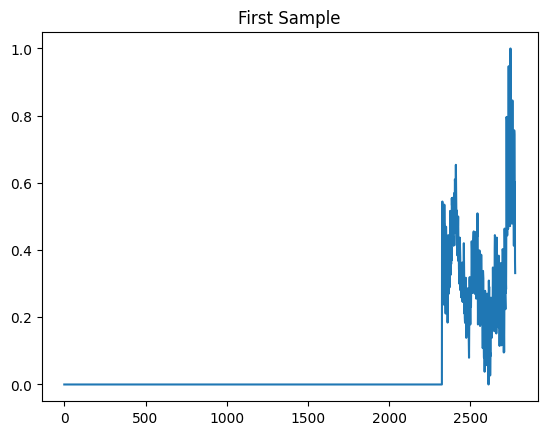

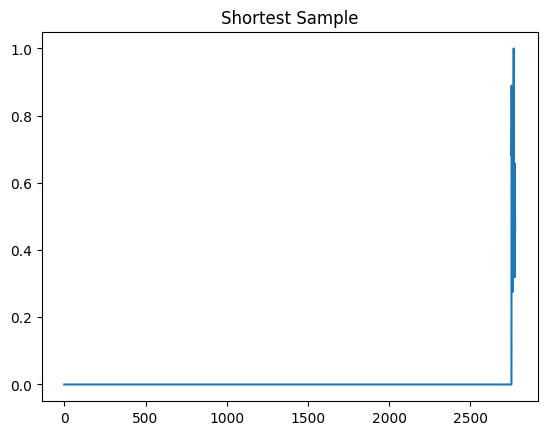

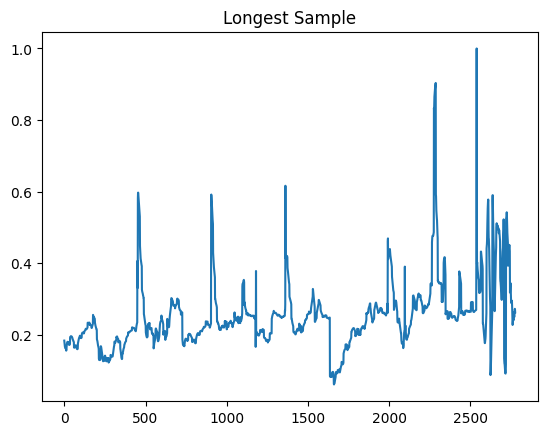

In [10]:
import matplotlib.pyplot as plt

plt.plot(sample_first)
plt.title('First Sample')
plt.show()

plt.plot(sample_shortest)
plt.title('Shortest Sample')
plt.show()

plt.plot(sample_longest)
plt.title('Longest Sample')
plt.show()

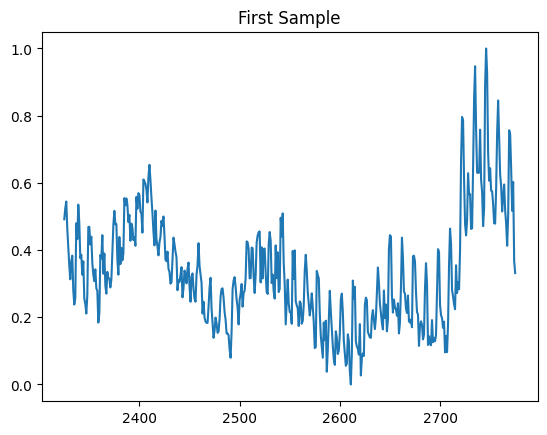

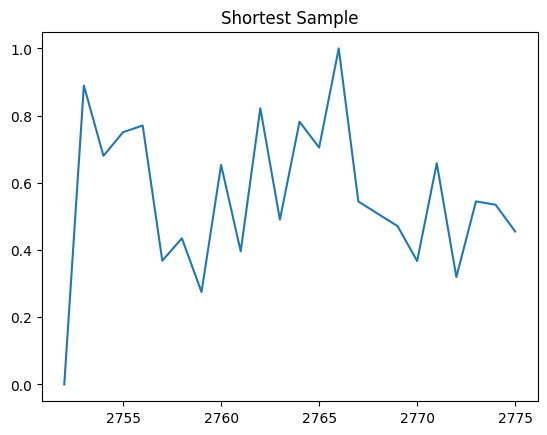

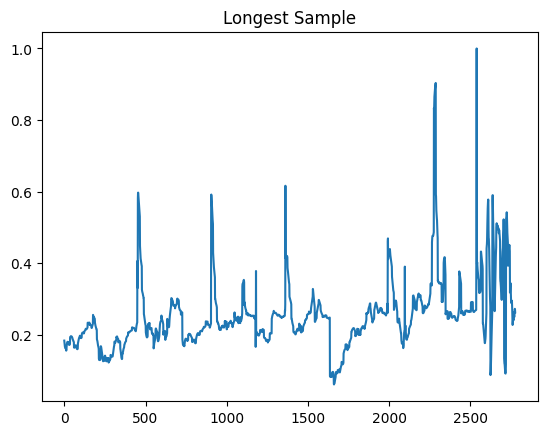

In [11]:
start_first, end_first = valid_periods[0]
sample_first_trimmed = sample_first[start_first:end_first]

plt.plot(sample_first_trimmed)
plt.title('First Sample')
plt.show()



start_shortest, end_shortest = valid_periods[index_shortest]
sample_shortest_trimmed = sample_shortest[start_shortest:end_shortest]

plt.plot(sample_shortest_trimmed)
plt.title('Shortest Sample')
plt.show()



start_longest, end_longest = valid_periods[index_longest]
sample_longest_trimmed = sample_longest[start_longest:end_longest]

plt.plot(sample_longest_trimmed)
plt.title('Longest Sample')
plt.show()


In [12]:
category_counts = np.unique(categories, return_counts=True)
for category, count in zip(category_counts[0], category_counts[1]):
    print(f"Category {category}: {count}")

Category A: 5728
Category B: 10987
Category C: 10017
Category D: 10016
Category E: 10975
Category F: 277


In [13]:
lengths = valid_periods[:, 1] - valid_periods[:, 0]

intervals = [(0, 300), (301, 600), (601, 900), (901, 1200), (1201, 1500), 
             (1501, 1800), (1801, 2100), (2101, 2400), (2401, 2776)]

interval_counts = {category: {interval: 0 for interval in intervals} for category in 'ABCDEF'}

for category, length in zip(categories, lengths):
    for interval in intervals:
        if interval[0] <= length < interval[1]:
            interval_counts[category][interval] += 1
            break

interval_counts_df = pd.DataFrame(interval_counts)

interval_ranges = [f"{start}-{end}" for start, end in intervals]
interval_counts_df.index = interval_ranges

interval_counts_df

,A,B,C,D,E,F
0-300,4276,10145,8527,7712,10320,230
301-600,1368,722,1235,2094,571,40
601-900,71,67,143,115,30,6
901-1200,1,3,17,5,5,1
1201-1500,0,3,3,2,3,0
1501-1800,0,0,2,0,0,0
1801-2100,1,0,0,3,0,0
2101-2400,0,0,1,0,1,0
2401-2776,0,0,2,1,0,0


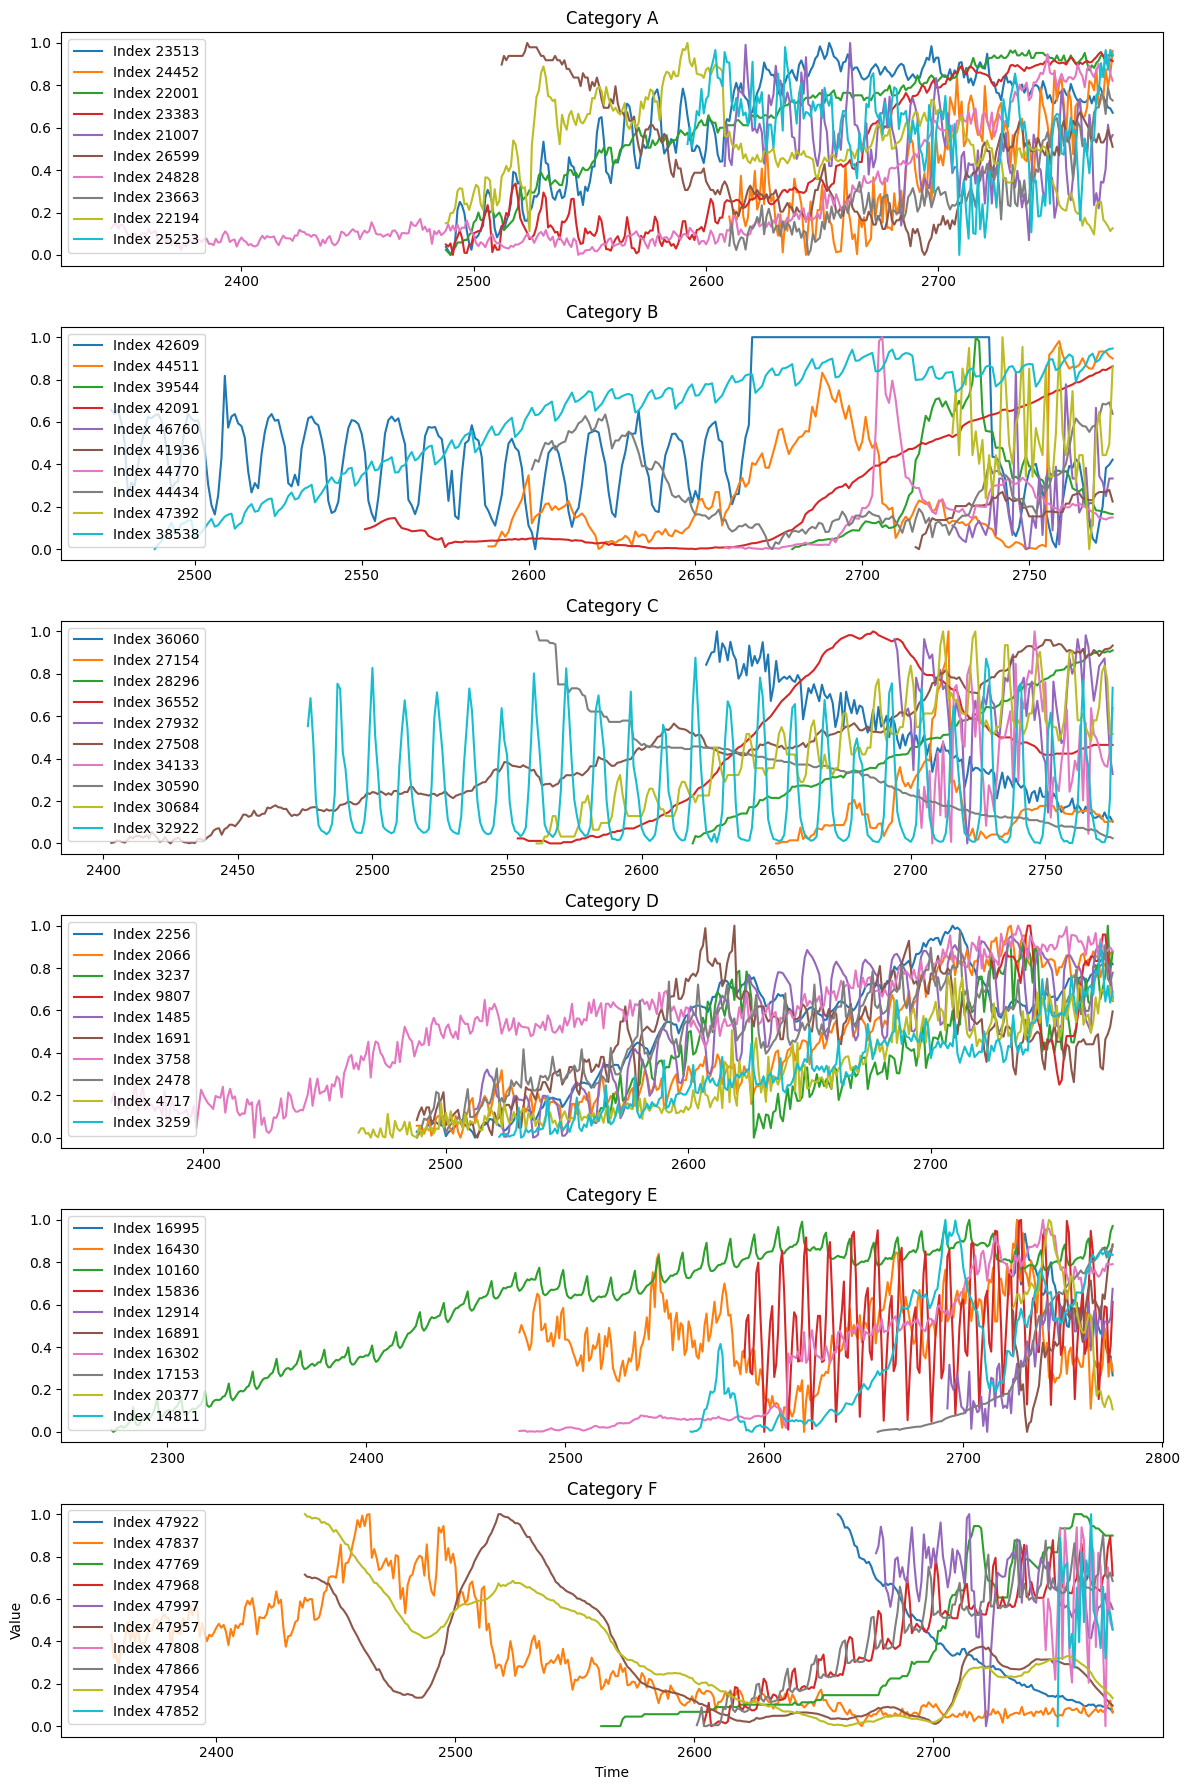

In [14]:
# Plot 10 time series for each category
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 18))
for i, category in enumerate(np.unique(categories)):
    # Get the indices of the time series for this category
    indices = np.where(categories == category)[0]
    # Randomly choose 10 indices from this category
    chosen_indices = np.random.choice(indices, 10, replace=False)
    
    for ts_index in chosen_indices:
        # Find the valid period for this time series
        start, end = valid_periods[ts_index]
        # Plot the time series data for its valid period
        axes[i].plot(range(start, end), training_data[ts_index, start:end], label=f'Index {ts_index}')
    
    axes[i].set_title(f'Category {category}')
    axes[i].legend()

plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [15]:
# Import the necessary function from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for Tukey's HSD test
data_for_tukey = np.array([(length, category) for length, category in zip(lengths, categories)])
lengths_for_tukey = data_for_tukey[:, 0].astype(float)
categories_for_tukey = data_for_tukey[:, 1]

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(lengths_for_tukey, categories_for_tukey)
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     A      B -112.2375    0.0 -118.3821 -106.0929   True
     A      C  -70.0341    0.0  -76.2798  -63.7883   True
     A      D  -61.1894    0.0  -67.4353  -54.9436   True
     A      E -115.1343    0.0 -121.2801 -108.9885   True
     A      F    -83.35    0.0 -106.5453  -60.1548   True
     B      C   42.2034    0.0   36.9947   47.4121   True
     B      D   51.0481    0.0   45.8393   56.2569   True
     B      E   -2.8968 0.5836   -7.9852    2.1915  False
     B      F   28.8875 0.0045    5.9497   51.8252   True
     C      D    8.8447    0.0    3.5169   14.1724   True
     C      E  -45.1002    0.0  -50.3103  -39.8902   True
     C      F  -13.3159 0.5635   -36.281    9.6491  False
     D      E  -53.9449    0.0  -59.1551  -48.7347   True
     D      F  -22.1606 0.0658  -45.1257    0.8045  False
     E      F 

In [16]:
mean_lengths = {}
for category in np.unique(categories):
    mean_lengths[category] = lengths[categories == category].mean()

print('MEAN LENGHTS')
mean_lengths

MEAN LENGHTS


{'A': 278.18034217877096,
 'B': 165.9428415400018,
 'C': 208.14625137266646,
 'D': 216.9909145367412,
 'E': 163.04601366742597,
 'F': 194.8303249097473}

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
reshaped_categories = categories.reshape(-1, 1)
onehot_categories = encoder.fit_transform(reshaped_categories)

onehot_categories

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [18]:
from sklearn.model_selection import train_test_split

# Split the indices of the time series into training and validation sets
train_indices, val_indices = train_test_split(np.arange(len(training_data_df)), test_size=0.2, random_state=42, stratify=categories)

# Use these indices to create training and validation sets
train_set = training_data_df.iloc[train_indices]
valid_periods_train = valid_periods[train_indices]
onehot_categories_train = onehot_categories[train_indices]

val_set = training_data_df.iloc[val_indices]
valid_periods_val = valid_periods[val_indices]
onehot_categories_val = onehot_categories[val_indices]

train_set.shape, valid_periods_train.shape, onehot_categories_train.shape, val_set.shape, valid_periods_val.shape, onehot_categories_val.shape

((38400, 2776), (38400, 2), (38400, 6), (9600, 2776), (9600, 2), (9600, 6))

In [19]:
def calculate_padding_length(sq, w, t, s):
    cycle = w + t
    if sq <= cycle: return cycle - sq
    else:
        m = (sq - cycle) % s
        if m == 0: return m
        else: return s - m

In [20]:
def create_sequences(df, valid_periods, categories, window, telescope, stride):

    input_sequences = []
    input_categories = []
    output_sequences = []
    

    for i in range(len(valid_periods)):
        start, end = valid_periods[i]
        category = categories[i]
        
        sequence = df.iloc[i, start:end].values
        
        padding_length = calculate_padding_length(len(sequence), window, telescope, stride)
        sequence = np.pad(sequence, (padding_length, 0), mode='constant', constant_values=0)

        for j in range(0, len(sequence) - window - telescope + 1, stride):
            input_seq = sequence[j:(j + window)]
            output_seq = sequence[(j + window):(j + window + telescope)]
            
            input_sequences.append(input_seq)
            input_categories.append(category)
            output_sequences.append(output_seq)

    return np.array(input_sequences), np.array(input_categories), np.array(output_sequences)

In [21]:
window = 120
telescope = 18
stride = 5

In [22]:
X_train, X_train_category, y_train = create_sequences(train_set, valid_periods_train, onehot_categories_train, window, telescope, stride)
X_val, X_val_category, y_val = create_sequences(val_set, valid_periods_val, onehot_categories_val, window, telescope, stride)
X_train.shape, X_train_category.shape, y_train.shape, X_val.shape, X_val_category.shape, y_val.shape

((710856, 120),
 (710856, 6),
 (710856, 18),
 (179858, 120),
 (179858, 6),
 (179858, 18))

In [23]:
input_shape = (window, 1)
category_shape = (6, )
output_shape = (telescope, 1)
batch_size = 64
epochs = 200

In [24]:
import tensorflow.keras.layers as tfkl
import tensorflow as tf

def build_CONV_LSTM_model_with_categories(input_shape, category_shape, output_shape):
    
    # Time series input
    time_series_input = tfkl.Input(shape=input_shape, name='time_series_input')
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True), name='bidirectional_lstm')(time_series_input)
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x)

    # Category input
    category_input = tfkl.Input(shape=category_shape, name='category_input')
    category_processed = tfkl.Dense(20, activation='relu')(category_input)

    # Combine the processed inputs
    combined = tfkl.Concatenate()([x, tfkl.RepeatVector(input_shape[0])(category_processed)])

    # Continue with convolutional layers
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(combined)
    output_layer = tfkl.Conv1D(output_shape[1], 3, padding='same')(x)
    crop_size = output_layer.shape[1] - output_shape[0]
    output_layer = tfkl.Cropping1D((0, crop_size))(output_layer)

    # Construct the model
    model = tf.keras.Model(inputs=[time_series_input, category_input], outputs=output_layer, name='CONV_LSTM_with_Categories')
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

    return model

In [25]:
model = build_CONV_LSTM_model_with_categories(input_shape, category_shape, output_shape)

Model: "CONV_LSTM_with_Categories"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 time_series_input (InputLa  [(None, 120, 1)]             0         []                            
 yer)                                                                                             
                                                                                                  
 category_input (InputLayer  [(None, 6)]                  0         []                            
 )                                                                                                
                                                                                                  
 bidirectional_lstm (Bidire  (None, 120, 128)             33792     ['time_series_input[0][0]']   
 ctional)                                                                 

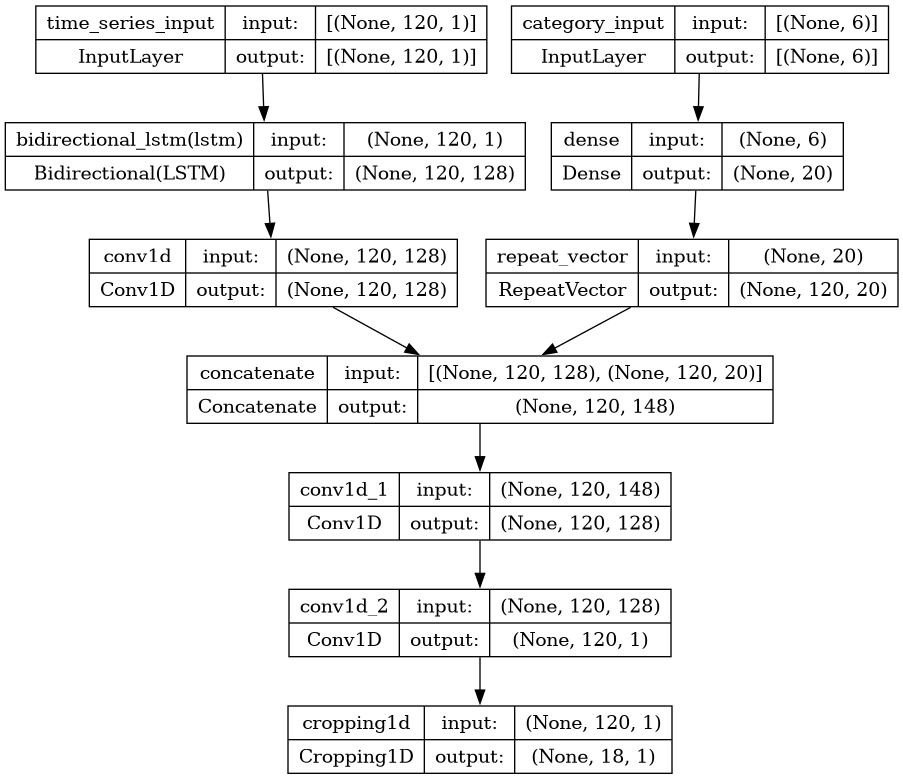

In [26]:
model.summary()

from tensorflow import keras as tfk
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    patience=12, 
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    mode='min', 
    patience=8, 
    factor=0.1, 
    min_lr=1e-5
)


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best',
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min"
)

history = model.fit(
    x = [X_train, X_train_category],
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = ([X_val, X_val_category], y_val),
    callbacks = [
        early_stopping,
        reduce_lr,
        checkpoint
    ]
).history

Epoch 1/200
11108/11108 [==============================] - 200s 17ms/step - loss: 0.0158 - val_loss: 0.0126 - lr: 0.0010
Epoch 2/200
11108/11108 [==============================] - 189s 17ms/step - loss: 0.0124 - val_loss: 0.0119 - lr: 0.0010
Epoch 3/200
11108/11108 [==============================] - 179s 16ms/step - loss: 0.0123 - val_loss: 0.0124 - lr: 0.0010
Epoch 4/200
11108/11108 [==============================] - 190s 17ms/step - loss: 0.0118 - val_loss: 0.0114 - lr: 0.0010
Epoch 5/200
11108/11108 [==============================] - 189s 17ms/step - loss: 0.0118 - val_loss: 0.0114 - lr: 0.0010
Epoch 6/200
11108/11108 [==============================] - 190s 17ms/step - loss: 0.0114 - val_loss: 0.0112 - lr: 0.0010
Epoch 7/200
11108/11108 [==============================] - 189s 17ms/step - loss: 0.0111 - val_loss: 0.0108 - lr: 0.0010
Epoch 8/200
11108/11108 [==============================] - 189s 17ms/step - loss: 0.0109 - val_loss: 0.0107 - lr: 0.0010
Epoch 9/200
11108/11108 [=======

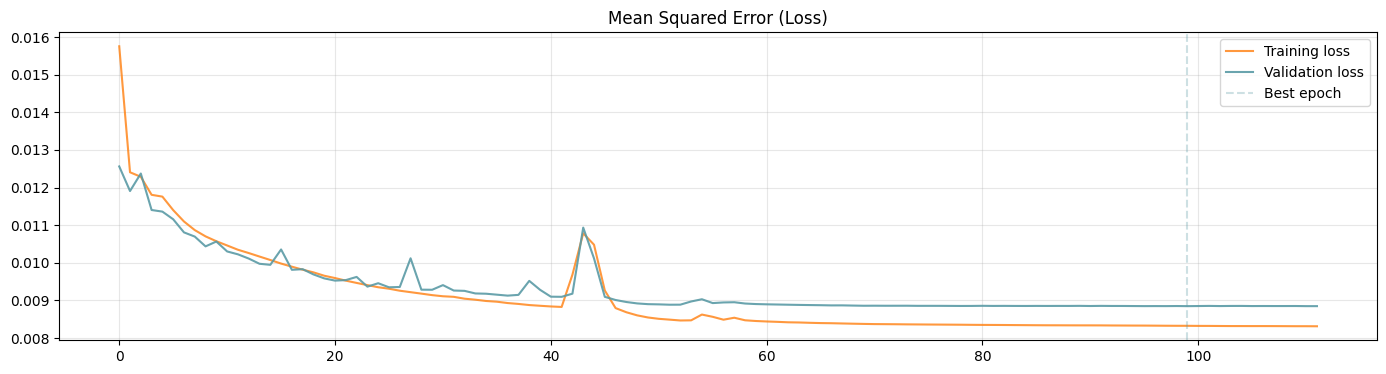

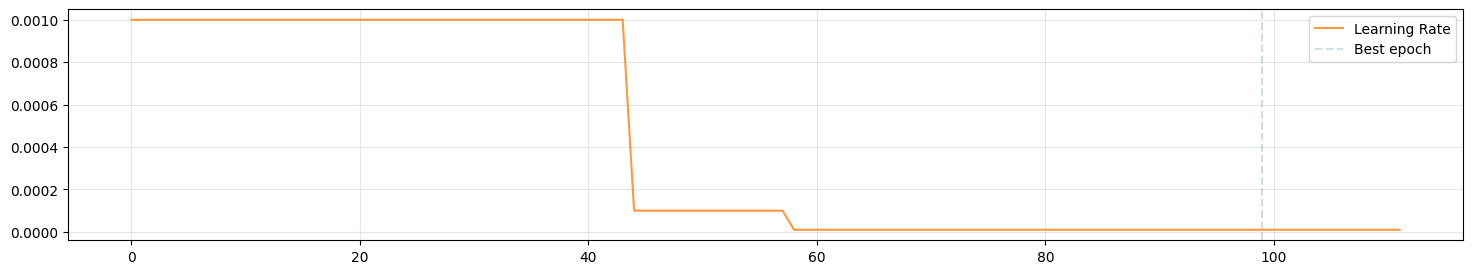

In [28]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [29]:
preds = model.predict([X_val, X_val_category])

5621/5621 [==============================] - 32s 6ms/step


In [30]:
preds.shape

(179858, 18, 1)

In [31]:
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y_val, np.squeeze(preds))
mse

0.008845694

In [32]:
def plot_with_training(y_train, y_true, y_pred, num_samples=3):
    """Plot the training, true, and predicted values for a random sample of sequences."""
    sample_indices = np.random.choice(np.arange(len(y_true)), num_samples, replace=False)

    for i, index in enumerate(sample_indices, 1):
        plt.figure(figsize=(12, 4))

        # Plot the training part (first 200 points)
        plt.plot(y_train[index].flatten(), label='Training Values', color='blue')

        # Plot the true values (next 18 points)
        true_start_index = len(y_train[index])
        plt.plot(range(true_start_index, true_start_index + len(y_true[index])),
                 y_true[index].flatten(), label='True Values', color='green')

        # Plot the predicted values (next 18 points)
        plt.plot(range(true_start_index, true_start_index + len(y_pred[index])),
                 y_pred[index].flatten(), label='Predicted Values', linestyle='--', color='red')

        plt.title(f'Sequence {i} - Training, True vs Predicted')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

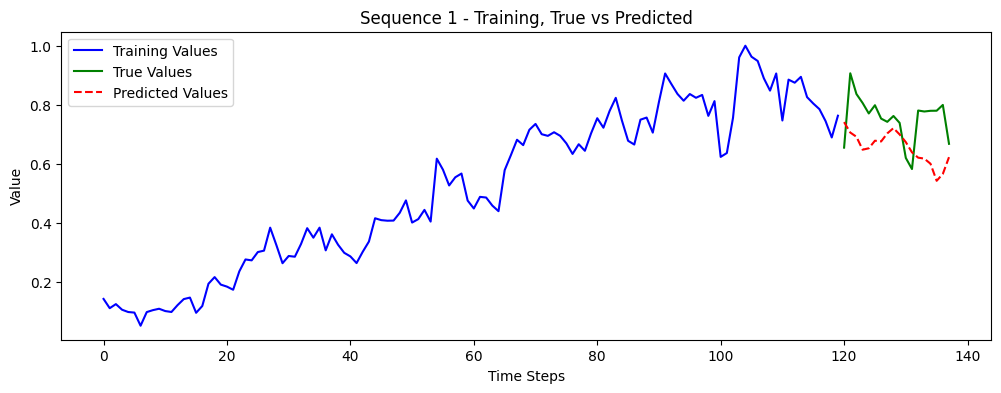

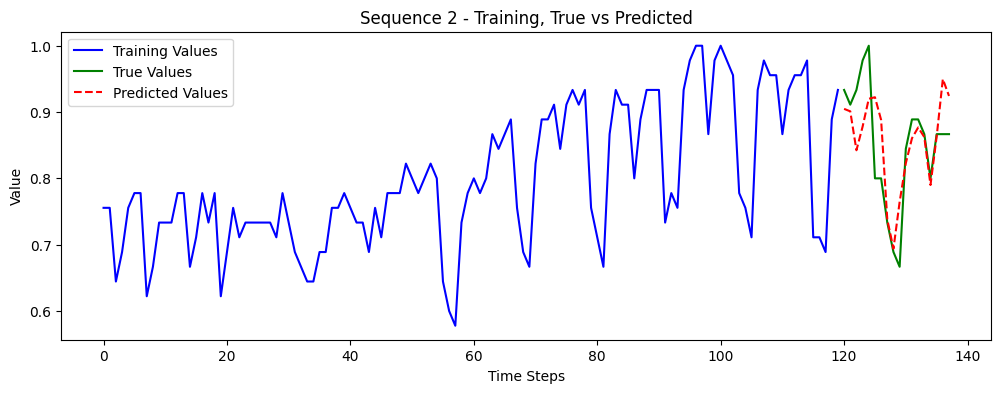

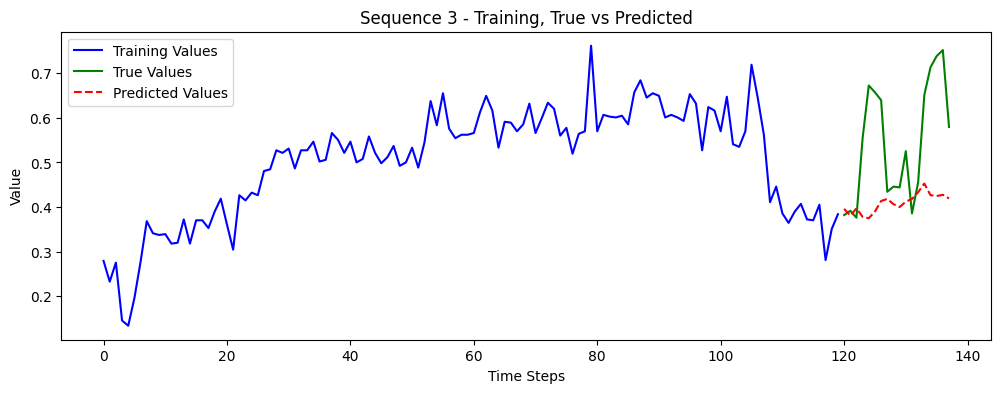

In [33]:
plot_with_training(X_val, y_val, preds)

In [34]:
model.save('conv_lstm_tp18_ws120')

In [35]:
!zip -r conv_lstm_tp18_ws120.zip /kaggle/working/conv_lstm_tp18_ws120

  adding: kaggle/working/conv_lstm_tp18_ws120/ (stored 0%)
  adding: kaggle/working/conv_lstm_tp18_ws120/fingerprint.pb (stored 0%)
  adding: kaggle/working/conv_lstm_tp18_ws120/variables/ (stored 0%)
  adding: kaggle/working/conv_lstm_tp18_ws120/variables/variables.index (deflated 65%)
  adding: kaggle/working/conv_lstm_tp18_ws120/variables/variables.data-00000-of-00001 (deflated 21%)
  adding: kaggle/working/conv_lstm_tp18_ws120/keras_metadata.pb (deflated 91%)
  adding: kaggle/working/conv_lstm_tp18_ws120/assets/ (stored 0%)
  adding: kaggle/working/conv_lstm_tp18_ws120/saved_model.pb (deflated 90%)


In [36]:
!zip -r best.zip /kaggle/working/best

  adding: kaggle/working/best/ (stored 0%)
  adding: kaggle/working/best/fingerprint.pb (stored 0%)
  adding: kaggle/working/best/variables/ (stored 0%)
  adding: kaggle/working/best/variables/variables.index (deflated 65%)
  adding: kaggle/working/best/variables/variables.data-00000-of-00001 (deflated 22%)
  adding: kaggle/working/best/keras_metadata.pb (deflated 91%)
  adding: kaggle/working/best/assets/ (stored 0%)
  adding: kaggle/working/best/saved_model.pb (deflated 90%)
